<a href="https://colab.research.google.com/github/sujata1606/Final-Year-Project/blob/main/Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#categorical encoding using Labelencoder
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
#Ignore warnings
import warnings
warnings.simplefilter(action ="ignore", category = FutureWarning)

In [ ]:
pd.set_option('display.max_columns',None)

In [2]:
# Get the data ready
df = pd.read_csv("Electronic Products Data.csv")
df

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a product,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all i

In [ ]:
df.head()

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a products,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good


In [ ]:
df.tail()

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all important,Moderately important,Give to a friend,4,Extermly good
213,4/7/2021 17:39,Sonam,25-35,Regularly,Rarely,Sometimes,Always,Rarely,New,Mobile devices,Smartphone,LG,Apple,Apple,"More than 70,000","20,000 - 30,000","50,000 - 60,000",During the sale,Online,Yes,Find out brand reputation,Less than 1 day,2 - 4 weeks,3 - 4 days,Less than 1 day,"60,000 - 80,000",Services offered,Extremely important,Moderately important,Very important,Not at all important,Not at all important,Sell on as second-hand,4,wow.....
214,4/8/2021 17:39,Kajal,18-25,Occasionally,Sometimes,Very Often,Always,Rarely,New,Mobile devices,Earphones,Godrej,Acer,Realme,"100 - 10,000","50,000 - 60,000","10,000 - 20,000",Without the sale (Off Season),Online,Yes,Read online reviews,5-10 days,1-3 months,4 - 4 days,1-3 months,"Less than 10,000",Quality of a product,Very important,Moderately important,Extremely important,Moderately important,Not at all important,Sell on as second-hand,4,Good overall
215,4/9/2021 17:39,Naman,25-35,Occasionally,Rarely,Sometimes,Always,Rarely,New,IT Devices,Laptop,Whirlpool,HP,Moto,"40,000 - 50,000","30,000 - 40,000","30,000 - 40,000",During the sale,In an electronics store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,2 - 4 weeks,5 - 4 days,5-10 days,"20,000 - 40,000",Quality of a product,Extremely important,Moderately important,Very important,Not at all important,Not at all important,Take to local recycling center,4,Nothing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     216 non-null    object
 1   Name                          216 non-null    object
 2   Age                           216 non-null    object
 3   howoften                      216 non-null    object
 4   Changecell                    216 non-null    object
 5   Uselaptop                     216 non-null    object
 6   Readlaunches                  216 non-null    object
 7   Trynewproduct                 216 non-null    object
 8   Type                          216 non-null    object
 9   Product                       216 non-null    object
 10  Item                          216 non-null    object
 11  Brand(HomeAppliances)         216 non-null    object
 12  Brand(ITDevices)              216 non-null    object
 13  Brand(MobileDevices)

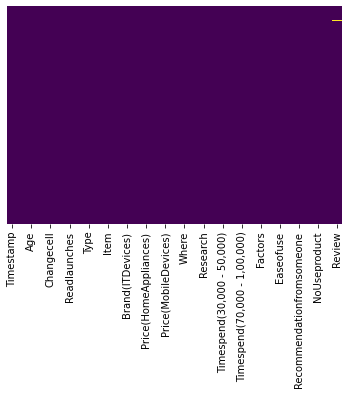

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [4]:
df=df.fillna(method='ffill')
df

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a product,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all i

In [5]:
#droppingunwanted
df.drop(['Timestamp', 'Name','NoUseproduct','Review'],axis=1,inplace=True)

In [ ]:
df.sample(5)

,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Rating
85,50 and above,Occasionally,Never,Never,Rarely,Rarely,New,Home appliances,Air conditioners,Godrej,Lenovo,Samsung,"40,000 - 50,000","30,000 - 40,000","10,000 - 20,000",During the sale,"In the exclusive brand store, In an electronic...",Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Quality of a product",Extremely important,Extremely important,Extremely important,Moderately important,Moderately important,4
72,35-50,Occasionally,Rarely,Rarely,Rarely,Rarely,Refurbished,"IT Devices, Mobile devices","Smartphone, Refrigerator",Samsung,Dell,OnePlus,"More than 70,000","60,000 - 70,000","50,000 - 60,000",During the sale,"Online, In the exclusive brand store, In an el...",Yes,Ask a friend/colleague/family member for their...,2 - 4 days,2 - 4 days,2 - 4 days,1-3 months,"20,000 - 40,000","Reliability of a product, Services offered, Pr...",Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,5
29,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,"Home appliances, IT Devices, Mobile devices","Television, Laptop, Smartphone, Air conditioners",Samsung,HP,Moto,"40,000 - 50,000","20,000 - 30,000","30,000 - 40,000",Without the sale (Off Season),"In the exclusive brand store, In an electronic...",Yes,Ask a friend/colleague/family member for their...,2 - 4 days,2 - 4 days,2 - 4 days,2 - 4 days,"20,000 - 40,000","Reliability of a product, Services offered, Pr...",Extremely important,Extremely important,Extremely important,Extremely important,Moderately important,4
37,35-50,Regularly,Always,Always,Always,Always,New,"IT Devices, Mobile devices","Television, Laptop, Smartphone, Desktop",Godrej,Apple,Apple,"More than 60,000","20,000 - 30,000","30,000 - 40,000",During the sale,Online,Yes,Compare them with competitive products,Less than 1 day,Less than 1 day,Less than 1 day,Less than 1 day,"More than 80,000",Quality of a product,Not at all important,Moderately important,Moderately important,Moderately important,Moderately important,5
70,35-50,Regularly,Always,Sometimes,Rarely,Rarely,New,"Home appliances, Mobile devices","Television, Laptop",LG,Lenovo,Samsung,"60,000 - 70,000","60,000 - 70,000","30,000 - 40,000",During the sale,In an electronics store,Yes,"Read online reviews, Find out brand reputation",Less than 1 day,2 - 4 days,2 - 4 weeks,1-3 months,"60,000 - 80,000","Reliability of a product, Quality of a product",Extremely important,Extremely important,Extremely important,Moderately important,Moderately important,3


In [6]:
#renaming columns
df.rename(columns ={
                      'howoften': 'how_often_buy', 
                      'Changecell': 'Change_cell',
                      'Uselaptop' : 'use_laptop',
                      'Readlaunches' : 'Read_product_launches',
                    'Trynewproduct' : 'Try_new_products',
                    'Type': 'Type_of_the_product',
                    'Brand(HomeAppliances)' : 'Brand_of_HomeAppliances',
                    'Brand(ITDevices)' : 'Brand_of_ITdevices',
                    'Brand(MobileDevices)' : 'Brand_of_MobileDevices',
                    'Price(HomeAppliances)' : 'Price_of_HomeAppliances',
                    'Price(ITDevices)' : 'Price_of_ITDevices',
                    'Price(MobileDevices)' : 'Price_of_MobileDevices',
                    'Time ' : 'Which_time_prefer',
                    'Where' : 'Where_do_you_prefer',
                    'Compareprices' : 'Compare_prices',
                    'Timespend(10,000 - 30,000)' : 'Timespend_on_10,000-30,000',
                    'Timespend(30,000 - 50,000)' : 'Timespend_on_30,000-50,000',
                    'Timespend(50,000 - 70,000)' : 'Timespend_on_50,000-70,000',
                    'Timespend(70,000 - 1,00,000)' : 'Timespend_on_70,000-1,00,000',
                    'Yearlyspending' : 'Yearly_spendings',
                    'Productfeatures' : 'Product_features',
                    'Easeofuse' : 'Ease_of_use',
                    'Recommendationfromsomeone' : 'Recommendation_from_someone',
                    'Salespersonrecommendation' : 'Sales_person_recommendation',
                    'NoUseproduct' :'No_use_product'
                     },inplace=True
                )

**Turn the categories data into numbers**

In [ ]:
# Using one hot encoding
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#categorical_features = ["Age",	"how_often_buy",	"Change_cell",	"use_laptop",	"Read_product_launches",	"Try_new_products",	"Type_of_the_product",	"Product",	"Item",	"Brand_of_HomeAppliances",	"Brand_of_ITdevices",	"Brand_of_MobileDevices",	"Price_of_HomeAppliances",	"Price_of_ITDevices",	"Price_of_MobileDevices",	"Which_time_prefer",	"Where_do_you_prefer",	"Compare_prices",	"Research",	"Timespend_on_10,000-30,000",	"Timespend_on_30,000-50,000",	"Timespend_on_50,000-70,000",	"Timespend_on_70,000-1,00,000",	"Yearly_spendings",	"Factors",	"Product_features",	"Ease_of_use",	"Warranty",	"Recommendation_from_someone",	"Sales_person_recommendation"]
#one_hot = OneHotEncoder()
#transformer = ColumnTransformer([("one_hot", 
                                 #one_hot, 
                                 #categorical_features)],
                                 #remainder="passthrough")
#transformed_X = transformer.fit_transform(df)
#transformed_X

In [ ]:
#transformed_X[0]

In [7]:
#Using labelEncoder
df['Age']=num.fit_transform(df['Age']).astype('int')
df['Type_of_the_product']=num.fit_transform(df['Type_of_the_product']).astype('int')
df['Change_cell']=num.fit_transform(df['Change_cell']).astype('int')
df['use_laptop']=num.fit_transform(df['use_laptop']).astype('int')
df['Read_product_launches']=num.fit_transform(df['Read_product_launches']).astype('int')
df['Brand_of_HomeAppliances']=num.fit_transform(df['Brand_of_HomeAppliances']).astype('int')
df['Brand_of_ITdevices']=num.fit_transform(df['Brand_of_ITdevices']).astype('int')
df['Brand_of_MobileDevices']=num.fit_transform(df['Brand_of_MobileDevices']).astype('int')
df['Price_of_HomeAppliances']=num.fit_transform(df['Price_of_HomeAppliances']).astype('int')
df['Price_of_ITDevices']=num.fit_transform(df['Price_of_ITDevices']).astype('int')
df['Price_of_MobileDevices']=num.fit_transform(df['Price_of_MobileDevices']).astype('int')
df['Timespend_on_10,000-30,000']=num.fit_transform(df['Timespend_on_10,000-30,000']).astype('int')
df['Timespend_on_30,000-50,000']=num.fit_transform(df['Timespend_on_30,000-50,000']).astype('int')
df['Timespend_on_50,000-70,000']=num.fit_transform(df['Timespend_on_50,000-70,000']).astype('int')
df['Timespend_on_70,000-1,00,000']=num.fit_transform(df['Timespend_on_70,000-1,00,000']).astype('int')
df['Yearly_spendings']=num.fit_transform(df['Yearly_spendings']).astype('int')
df['Product_features']=num.fit_transform(df['Product_features']).astype('int')
df['Ease_of_use']=num.fit_transform(df['Ease_of_use']).astype('int')
df['Warranty']=num.fit_transform(df['Warranty']).astype('int')
df['Factors']=num.fit_transform(df['Factors']).astype('int')
df['Which_time_prefer']=num.fit_transform(df['Which_time_prefer']).astype('int')
df['Where_do_you_prefer']=num.fit_transform(df['Where_do_you_prefer']).astype('int')
df['Research']=num.fit_transform(df['Research']).astype('int')
df['Product']=num.fit_transform(df['Product']).astype('int')
df['Item']=num.fit_transform(df['Item']).astype('int')
df['Recommendation_from_someone']=num.fit_transform(df['Recommendation_from_someone']).astype('int')
df['Sales_person_recommendation']=num.fit_transform(df['Sales_person_recommendation']).astype('int')
df.sample(5)

,Age,how_often_buy,Change_cell,use_laptop,Read_product_launches,Try_new_products,Type_of_the_product,Product,Item,Brand_of_HomeAppliances,Brand_of_ITdevices,Brand_of_MobileDevices,Price_of_HomeAppliances,Price_of_ITDevices,Price_of_MobileDevices,Which_time_prefer,Where_do_you_prefer,Compare_prices,Research,"Timespend_on_10,000-30,000","Timespend_on_30,000-50,000","Timespend_on_50,000-70,000","Timespend_on_70,000-1,00,000",Yearly_spendings,Factors,Product_features,Ease_of_use,Warranty,Recommendation_from_someone,Sales_person_recommendation,Rating
199,2,Regularly,4,4,0,Very Often,0,5,4,4,6,8,6,5,4,1,3,Yes,3,2,2,2,2,2,4,0,3,0,1,1,4
74,2,Regularly,2,2,2,Rarely,0,6,22,3,6,0,8,6,7,0,8,Yes,5,3,3,6,3,5,8,0,0,0,0,2,5
124,1,Regularly,4,0,4,Very Often,0,7,8,7,6,8,6,5,4,0,3,Yes,5,1,3,2,0,3,6,0,0,0,2,2,3
73,1,Regularly,3,3,3,Sometimes,0,4,10,4,3,3,4,3,2,1,7,Yes,7,4,1,6,0,3,12,3,3,3,3,1,5
108,1,Occasionally,4,0,4,Very Often,0,1,18,3,5,6,5,4,3,0,7,Yes,2,1,3,2,2,3,6,0,0,0,1,1,5


In [8]:
#Another way
dummies = pd.get_dummies(df[["how_often_buy",	"Type_of_the_product", "Compare_prices"]])
dummies

,Type_of_the_product,how_often_buy_Occasionally,how_often_buy_Regularly,Compare_prices_No,Compare_prices_Yes
0,0,1,0,1,0
1,0,1,0,1,0
2,1,0,1,0,1
3,0,1,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
211,0,0,1,0,1
212,1,1,0,0,1
213,0,0,1,0,1
214,0,1,0,0,1


In [9]:
merge = pd.concat([df,dummies],axis='columns')
merge

,Age,how_often_buy,Change_cell,use_laptop,Read_product_launches,Try_new_products,Type_of_the_product,Product,Item,Brand_of_HomeAppliances,Brand_of_ITdevices,Brand_of_MobileDevices,Price_of_HomeAppliances,Price_of_ITDevices,Price_of_MobileDevices,Which_time_prefer,Where_do_you_prefer,Compare_prices,Research,"Timespend_on_10,000-30,000","Timespend_on_30,000-50,000","Timespend_on_50,000-70,000","Timespend_on_70,000-1,00,000",Yearly_spendings,Factors,Product_features,Ease_of_use,Warranty,Recommendation_from_someone,Sales_person_recommendation,Rating,Type_of_the_product,how_often_buy_Occasionally,how_often_buy_Regularly,Compare_prices_No,Compare_prices_Yes
0,0,Occasionally,2,0,4,Rarely,0,5,9,3,6,0,5,4,3,0,0,No,1,1,0,0,0,1,0,3,3,3,3,3,4,0,1,0,1,0
1,0,Occasionally,3,3,3,Very Often,0,5,19,4,3,4,4,3,6,0,1,No,0,1,3,2,0,4,2,0,0,0,0,0,2,0,1,0,1,0
2,1,Regularly,2,0,0,Rarely,1,7,19,7,6,6,4,4,2,0,0,Yes,9,4,2,2,2,1,2,1,1,1,1,2,4,1,0,1,0,1
3,0,Occasionally,3,0,0,Sometimes,0,5,9,4,5,10,2,2,1,0,0,Yes,9,3,1,1,4,1,2,1,1,1,2,1,5,0,1,0,0,1
4,1,Regularly,4,4,4,Very Often,0,5,9,7,5,4,3,6,3,1,3,Yes,1,2,2,1,3,3,0,3,1,1,1,2,4,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,Regularly,4,0,0,Sometimes,0,5,4,1,0,1,5,5,4,0,3,Yes,0,4,2,0,3,1,2,1,1,3,2,1,3,0,0,1,0,1
212,0,Occasionally,2,0,0,Rarely,1,1,24,4,3,6,8,3,4,0,1,Yes,0,1,3,1,3,1,3,0,1,3,2,1,4,1,1,0,0,1
213,1,Regularly,2,3,0,Rarely,0,7,19,3,2,0,8,2,5,0,3,Yes,11,4,2,3,4,3,11,0,1,3,2,2,4,0,0,1,0,1
214,0,Occasionally,3,4,0,Rarely,0,7,8,1,0,8,1,5,0,1,3,Yes,12,3,0,4,0,4,2,3,1,0,1,2,4,0,1,0,0,1


In [10]:
final = merge.drop(['how_often_buy','Try_new_products','Compare_prices','Where_do_you_prefer','Which_time_prefer'],axis='columns')
final

,Age,Change_cell,use_laptop,Read_product_launches,Type_of_the_product,Product,Item,Brand_of_HomeAppliances,Brand_of_ITdevices,Brand_of_MobileDevices,Price_of_HomeAppliances,Price_of_ITDevices,Price_of_MobileDevices,Research,"Timespend_on_10,000-30,000","Timespend_on_30,000-50,000","Timespend_on_50,000-70,000","Timespend_on_70,000-1,00,000",Yearly_spendings,Factors,Product_features,Ease_of_use,Warranty,Recommendation_from_someone,Sales_person_recommendation,Rating,Type_of_the_product,how_often_buy_Occasionally,how_often_buy_Regularly,Compare_prices_No,Compare_prices_Yes
0,0,2,0,4,0,5,9,3,6,0,5,4,3,1,1,0,0,0,1,0,3,3,3,3,3,4,0,1,0,1,0
1,0,3,3,3,0,5,19,4,3,4,4,3,6,0,1,3,2,0,4,2,0,0,0,0,0,2,0,1,0,1,0
2,1,2,0,0,1,7,19,7,6,6,4,4,2,9,4,2,2,2,1,2,1,1,1,1,2,4,1,0,1,0,1
3,0,3,0,0,0,5,9,4,5,10,2,2,1,9,3,1,1,4,1,2,1,1,1,2,1,5,0,1,0,0,1
4,1,4,4,4,0,5,9,7,5,4,3,6,3,1,2,2,1,3,3,0,3,1,1,1,2,4,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,4,0,0,0,5,4,1,0,1,5,5,4,0,4,2,0,3,1,2,1,1,3,2,1,3,0,0,1,0,1
212,0,2,0,0,1,1,24,4,3,6,8,3,4,0,1,3,1,3,1,3,0,1,3,2,1,4,1,1,0,0,1
213,1,2,3,0,0,7,19,3,2,0,8,2,5,11,4,2,3,4,3,11,0,1,3,2,2,4,0,0,1,0,1
214,0,3,4,0,0,7,8,1,0,8,1,5,0,12,3,0,4,0,4,2,3,1,0,1,2,4,0,1,0,0,1


In [11]:
df.dtypes

Age                              int64
how_often_buy                   object
Change_cell                      int64
use_laptop                       int64
Read_product_launches            int64
Try_new_products                object
Type_of_the_product              int64
Product                          int64
Item                             int64
Brand_of_HomeAppliances          int64
Brand_of_ITdevices               int64
Brand_of_MobileDevices           int64
Price_of_HomeAppliances          int64
Price_of_ITDevices               int64
Price_of_MobileDevices           int64
Which_time_prefer                int64
Where_do_you_prefer              int64
Compare_prices                  object
Research                         int64
Timespend_on_10,000-30,000       int64
Timespend_on_30,000-50,000       int64
Timespend_on_50,000-70,000       int64
Timespend_on_70,000-1,00,000     int64
Yearly_spendings                 int64
Factors                          int64
Product_features         

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


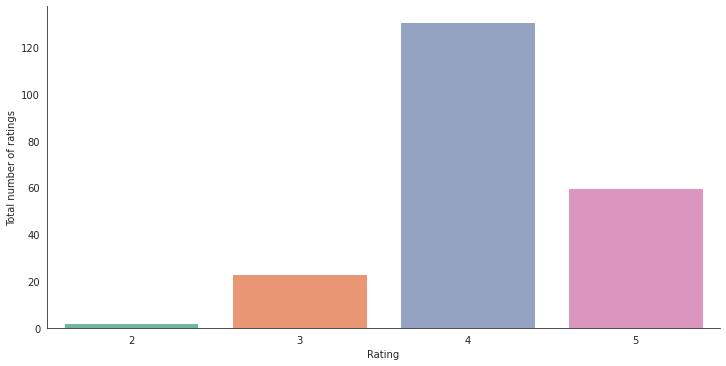

In [ ]:
# Check the distribution of the rating
with sns.axes_style('white'):
    R = sns.factorplot("Rating", data=final, aspect=2.0,kind='count', palette='Set2')
    R.set_ylabels("Total number of ratings")

In [ ]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(final.Rating.min()))
print('Maximum rating is: %d' %(final.Rating.max()))

Minimum rating is: 2
Maximum rating is: 5


Lets compare the average rating for each product vs the number of people who rated for the product. This will help identify products which have a very high or low rating because of very few ratings received.

In [ ]:
ratings=pd.DataFrame(final.groupby('Product')['Rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(final.groupby('Product')['Rating'].count())
ratings.head()

,Rating,Number_Of_Ratings
Product,,
0,5.000000,1
1,4.161765,68
2,4.000000,2
3,4.714286,7
4,4.000000,11


Let's now check the distribution of count of ratings and the mean ratings


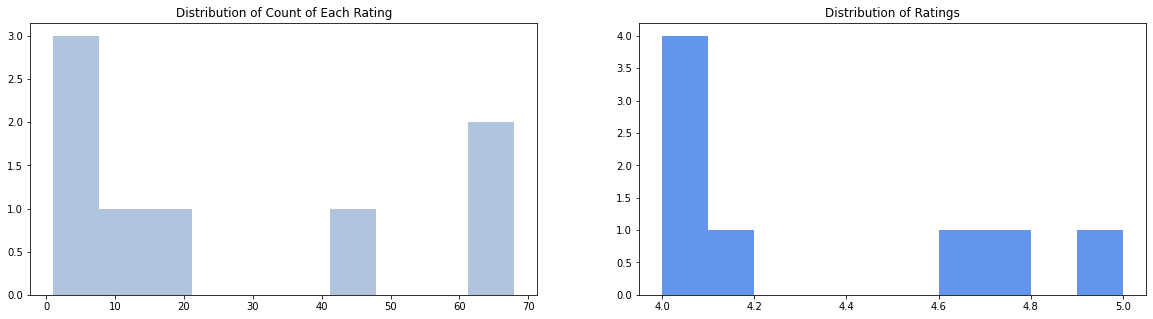

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings, color='lightsteelblue')
plt.title('Distribution of Count of Each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.Rating, color='cornflowerblue')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
ratings.describe()

,Rating,Number_Of_Ratings
count,8.000000,8.000000
mean,4.327336,27.000000
std,0.396944,27.861904
min,4.000000,1.000000
25%,4.023810,5.750000
50%,4.112797,14.000000
75%,4.663866,51.000000
max,5.000000,68.000000


Text(0.5, 1.0, 'Distribution of Ratings')

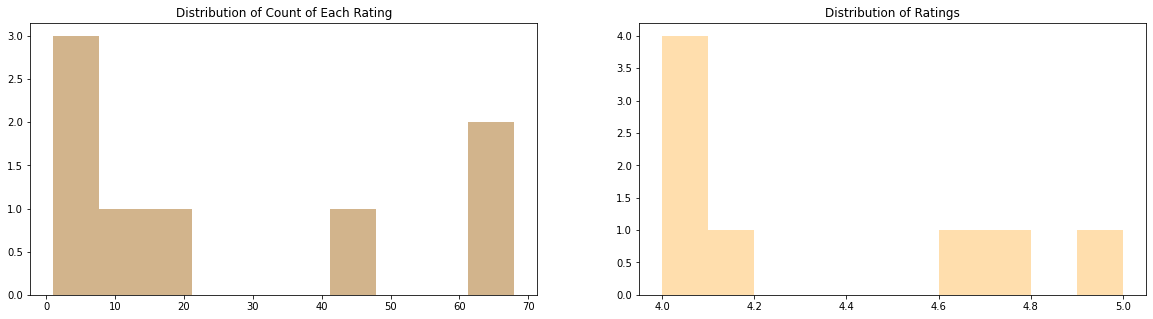

In [ ]:
ratings=pd.DataFrame(df.groupby('Product')['Rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('Product')['Rating'].count())

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings, color='tan')
plt.title('Distribution of Count of Each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.Rating, color='navajowhite')
plt.title('Distribution of Ratings')

In [ ]:
#ratings for each products
most_rated=df.groupby('Product').size().sort_values(ascending=False)
most_rated

Product
1    68
7    63
5    47
6    17
4    11
3     7
2     2
0     1
dtype: int64

**Which Product got Highnest Number of rating?**

In [ ]:
HomeAppliances = df.loc[(df['Brand_of_HomeAppliances'] ) ]
ITdevices = df.loc[(df['Brand_of_ITdevices']) ]
MobileDevices = df.loc[(df['Brand_of_MobileDevices'] ) ]

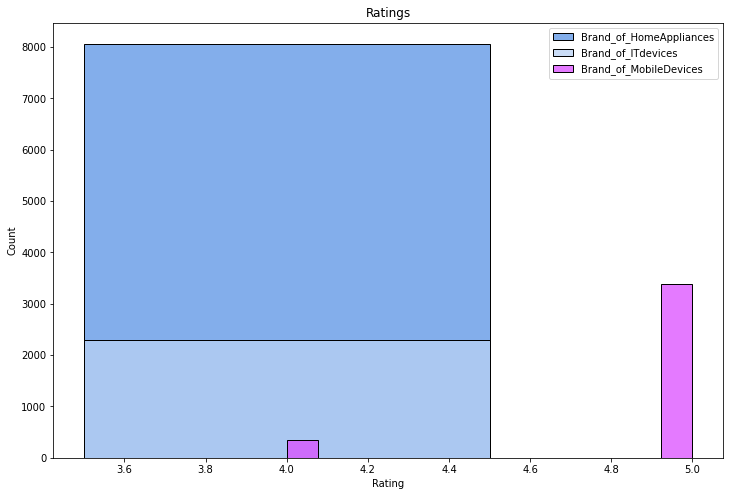

In [ ]:
HomeAppliances_rating = HomeAppliances.loc[(HomeAppliances['Rating'])] 
ITdevices_rating = ITdevices.loc[(ITdevices['Rating'] ) ]
MobileDevices_rating = MobileDevices.loc[(MobileDevices['Rating'])] 

plt.figure(figsize=(12,8))
plt.title('Ratings')

sns.histplot(HomeAppliances_rating['Rating'], color='#5993E5')
sns.histplot(ITdevices_rating['Rating'], color='#B9D1F4' )
sns.histplot(MobileDevices_rating['Rating'], color='#DB4DFF') 

plt.legend(['Brand_of_HomeAppliances', 'Brand_of_ITdevices', 'Brand_of_MobileDevices'])
plt.show()


Based on overall ratings

In [12]:
# Create X (features matrix)
X = final.drop("Rating", axis=1)

# Create y (labels)
y = final["Rating"]

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 30), (44, 30), (172,), (44,))

In [18]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [19]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Decision Tree': 0.4772727272727273,
 'Logistic Regression': 0.7045454545454546,
 'Random Forest': 0.8181818181818182}

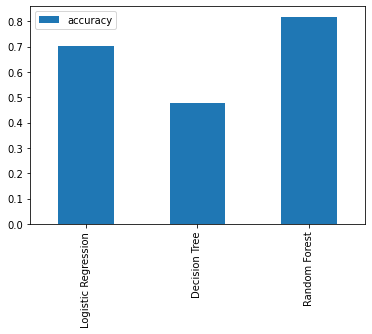

In [20]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();